In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plotly_renderer = None
plotly_renderer = "notebook"

In [14]:
action_counts = pd.read_csv("skew.csv",header=None, names=['action', 'frames'])

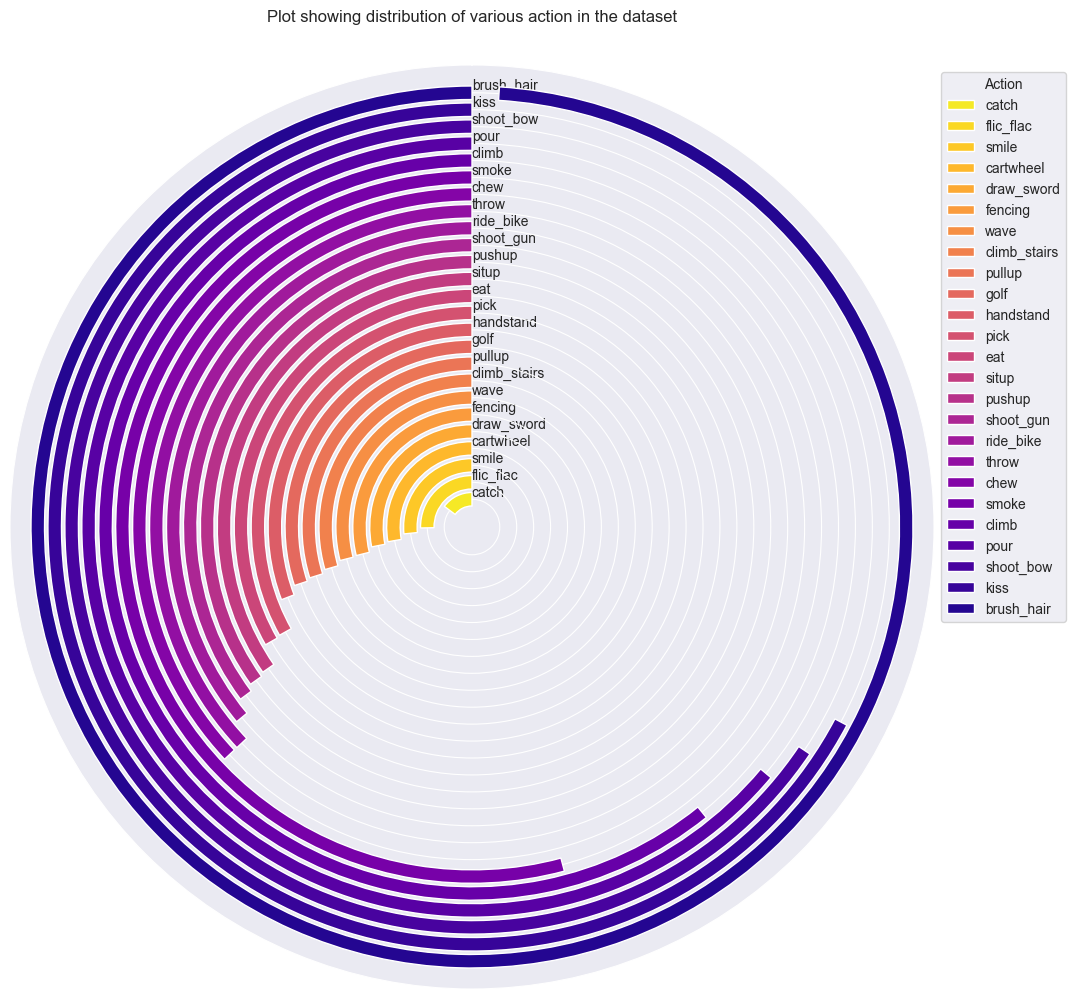

<Figure size 640x480 with 0 Axes>

In [15]:
action_counts.sort_values(by=['frames'], inplace=True)

def get_color(name, number):
    pal = list(sns.color_palette(palette=name, n_colors=number).as_hex())
    return pal

pal_plas = get_color('plasma_r', len(action_counts))

plt.gcf().set_size_inches(14, 12)
fig = plt.gcf()

sns.set_style('darkgrid')

#set max value
max_val = max(action_counts['frames'])*1.01
ax = plt.subplot(projection='polar')

#set the subplot 
ax.set_theta_zero_location('N')
ax.set_theta_direction(1)
ax.set_rlabel_position(0)
ax.set_thetagrids([], labels=[])
ax.set_rgrids(range(len(action_counts)), labels= action_counts['action'])

#set the projection
ax = plt.subplot(projection='polar')

for i in range(len(action_counts)):
    ax.barh(i, list(action_counts['frames'])[i]*2*np.pi/max_val,
            label=list(action_counts['action'])[i], color=pal_plas[i])

plt.legend(bbox_to_anchor=(1, 1), loc=2, title = "Action")
ax.set_title("Plot showing distribution of various action in the dataset", va='top', pad=40);
plt.show()
plt.draw()
fig.savefig(f'action_counts.jpeg', dpi=100)

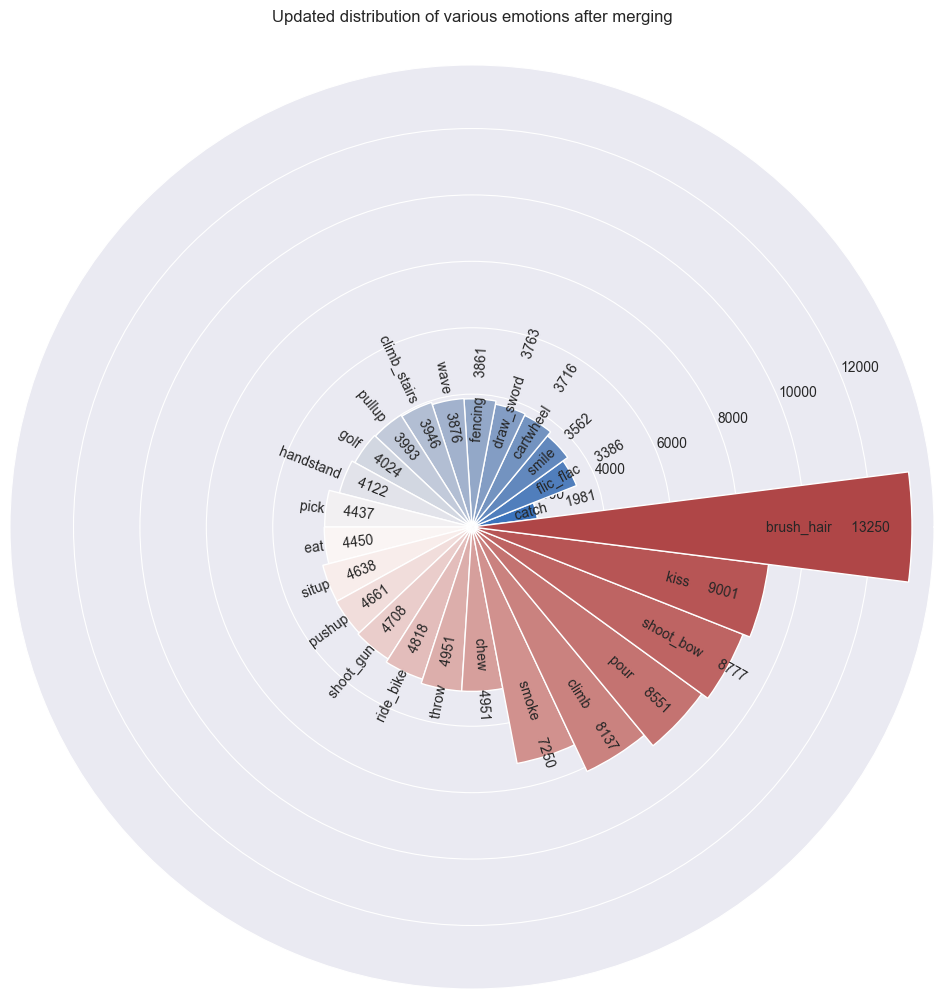

<Figure size 640x480 with 0 Axes>

In [23]:
plt.figure(figsize=(12,12))
fig = plt.gcf()
ax = plt.subplot(111, polar=True)
plt.axis()

pal_vi = get_color('vlag', len(action_counts))

#set min and max value
lowerLimit = 0
max_v = action_counts['frames'].max()

#set heights and width
heights = action_counts['frames']
width = 2*np.pi / len(action_counts.index)

#set index and angle
indexes = list(range(1, len(action_counts.index)+1))
angles = [element * width for element in indexes]

bars = ax.bar(x=angles, height=heights, width=width, bottom=lowerLimit,
              linewidth=1, edgecolor="white", color=pal_vi)
labelPadding = 20

for bar, angle, height, label in zip(bars,angles, heights, action_counts['action']):
    rotation = np.rad2deg(angle)
    alignment = ""
    #deal with alignment
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"
    ax.text(x=angle, y=lowerLimit + bar.get_height()/1.5 + labelPadding,
            s="{}     {}".format(label,height), ha=alignment, va='center', rotation=rotation, 
            rotation_mode="anchor")
    ax.set_thetagrids([], labels=[])

ax.set_title("Updated distribution of various emotions after merging", va='top', pad=40);
plt.show()
plt.draw()
fig.savefig(f'sun_action.jpeg', dpi=200)

In [27]:
fig = px.bar(action_counts, x='action', y='frames', text='frames',
             color ='action', color_discrete_sequence=pal_vi)

fig.update_traces(texttemplate='%{text:.3s}', textposition='outside')
fig.update_layout({'plot_bgcolor': 'white',
                   'paper_bgcolor': 'white'})

fig.update_layout(width=1000, height=500,
                  margin = dict(t=15, l=15, r=15, b=15))
fig.update_layout(
    title=dict(text="Updated distribution of various emotions after merging")
)
fig.show()
fig.write_image(f'action_grouping_bar.jpeg',scale=10)